In [1]:
import os
print(os.cpu_count())

2


In [2]:
import numpy as np
import time
import math

# Problems
#import src.problems.more_trig as problem
#import src.problems.more_eps as problem
#import src.problems.cuter as problem
#import src.problems.denoise_image as problem
#import src.problems.lr_gen_l1 as problem
#import src.problems.easy as problem
import src.problems.rosenbrock as problem

# Config and method
from src.cgd import choice_coordinates, calculate_H, calulate_direction, calculate_alpha, count_nonzeros, step
from src.metrics import init_metrics, generate_metrics


In [3]:
# Config

armijo = {
    'alfa_init': 1,
    'sigma': 0.1,
    'beta': 0.5,
    'gamma': 0,
    'stop_alfa': 1e-18 # Paper use 1e-30
}

v_gauss_sw_init = 0.5  # Init like paper

use_parallel = False

#c=problem.c
c=1

In [4]:

# Get x0
x = problem.x_init()

# Init config
alfa = armijo['alfa_init']
v_gauss_southwell = v_gauss_sw_init

# Init metrics
hist, ts_metrics = init_metrics()

# Loop
k = 0
while True:
    #if k >= 10:
    #    break

    # One step of the method
    (x,
    alfa,
    v_gauss_southwell,
    stop_loop,
    step_metrics) = step(k,
                         x,
                         problem,
                         c,
                         armijo,
                         alfa,
                         v_gauss_southwell,
                         use_parallel,
                         ts_metrics)
    k = k+1

    # Show metrics.
    hist.append(step_metrics)

    if stop_loop:
        break



Iteration 0
f value:, 19894.58
f grad:, 2946.78
Lenght J: 570 / 1000
NZ: 1000 / 1000

Iteration 1
f value:, 10859.86
f grad:, 2715.01
Lenght J: 921 / 1000
NZ: 1000 / 1000

Iteration 2
f value:, 6601.34
f grad:, 2475.83
Lenght J: 993 / 1000
NZ: 1000 / 1000

Iteration 3
f value:, 4416.82
f grad:, 2196.92
Lenght J: 996 / 1000
NZ: 1000 / 1000

Iteration 4
f value:, 3443.02
f grad:, 2579.47
Lenght J: 997 / 1000
NZ: 1000 / 1000

Iteration 5
f value:, 2529.50
f grad:, 2414.76
Lenght J: 997 / 1000
NZ: 1000 / 1000

Iteration 6
f value:, 2062.07
f grad:, 2347.14
Lenght J: 998 / 1000
NZ: 1000 / 1000

Iteration 7
f value:, 1660.36
f grad:, 2157.01
Lenght J: 998 / 1000
NZ: 1000 / 1000

Iteration 8
f value:, 1173.10
f grad:, 1919.40
Lenght J: 994 / 1000
NZ: 1000 / 1000

Iteration 9
f value:, 706.74
f grad:, 1432.36
Lenght J: 997 / 1000
NZ: 1000 / 1000

Iteration 10
f value:, 400.69
f grad:, 1138.63
Lenght J: 998 / 1000
NZ: 1000 / 1000

Iteration 11
f value:, 245.35
f grad:, 882.47
Lenght J: 994 / 1

In [7]:
from src.l_bfgs_b import l_bfgs_b

result = l_bfgs_b(problem, c)
print(f"Function obj: {result[1]}")
print(f"Non Zeros: {result[2]}")
print(f"Seconds: {result[3]}")


KeyboardInterrupt: 

In [6]:
result[0]

array([ 9.00000000e-01,  9.00000000e-01,  9.00000000e-01,  9.00000000e-01,
        9.00000000e-01,  9.00000000e-01,  9.00000000e-01,  9.00000000e-01,
        9.00000000e-01,  9.00000000e-01,  9.00000000e-01,  9.00000000e-01,
        9.00000000e-01,  9.00000000e-01,  9.00000000e-01,  9.00000000e-01,
        9.00000000e-01,  9.00000000e-01,  9.00000000e-01,  9.00000000e-01,
        9.00000000e-01,  9.00000000e-01,  9.00000000e-01,  9.00000000e-01,
        9.00000000e-01,  9.00000000e-01,  9.00000000e-01,  9.00000000e-01,
        9.00000000e-01,  9.00000000e-01,  9.00000000e-01,  9.00000000e-01,
        9.00000000e-01,  9.00000000e-01,  9.00000000e-01,  9.00000000e-01,
        9.00000000e-01,  9.00000000e-01,  9.00000000e-01,  9.00000000e-01,
        9.00000000e-01,  9.00000000e-01,  9.00000000e-01,  9.00000000e-01,
        8.77027364e-01,  8.09184761e-01,  6.81344484e-01,  4.78285445e-01,
        2.37345078e-01,  6.11890729e-02,  1.27161579e-02,  1.03081228e-02,
        1.02112612e-02,  

Total seconds: 0.334


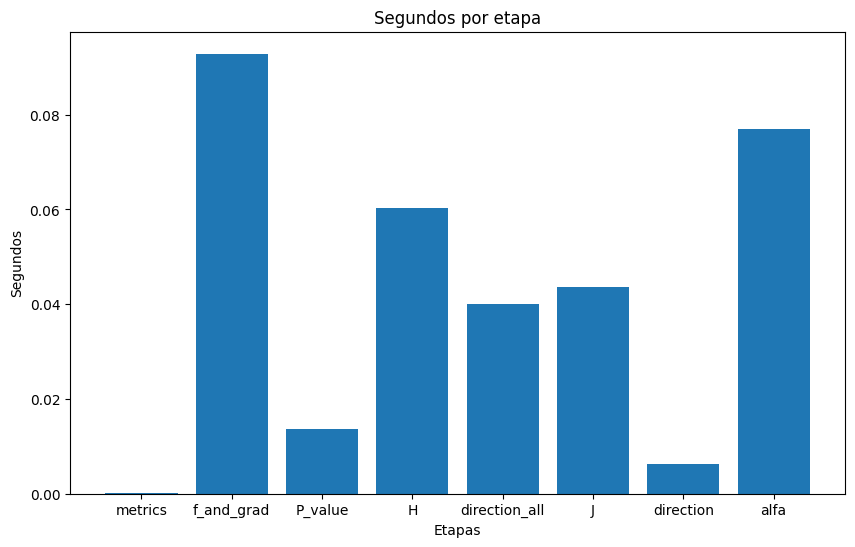

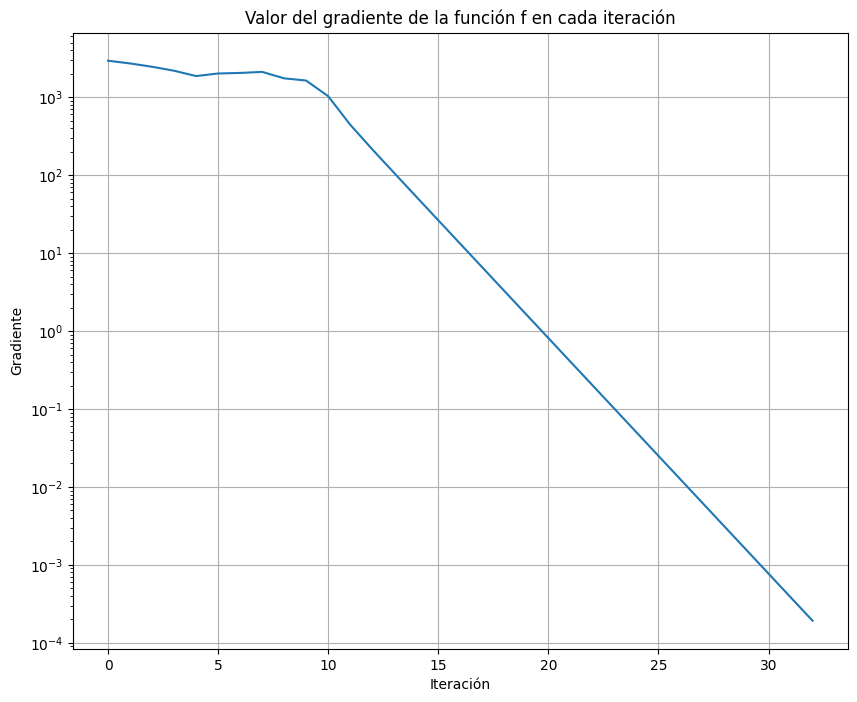

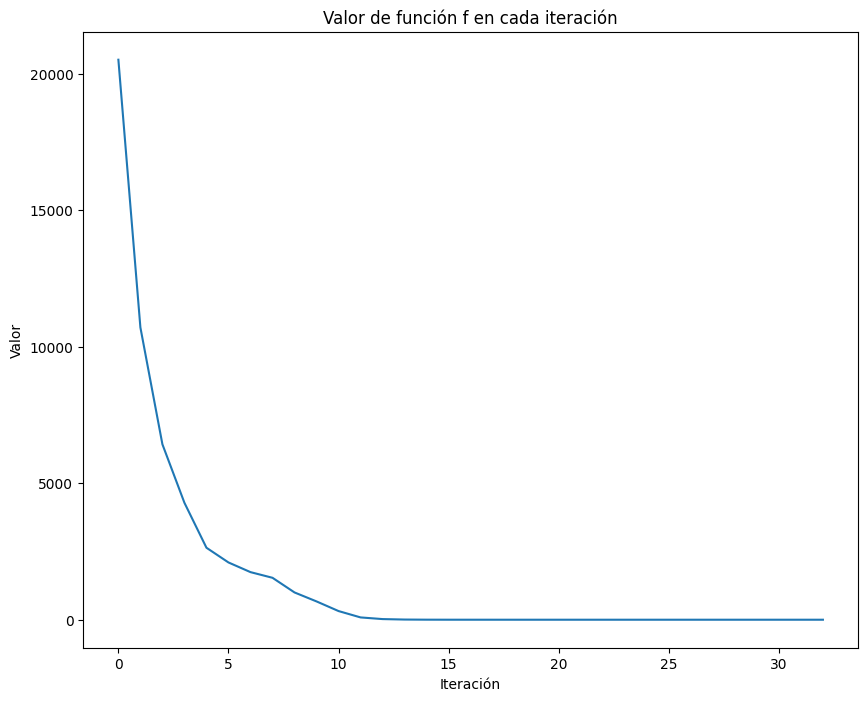

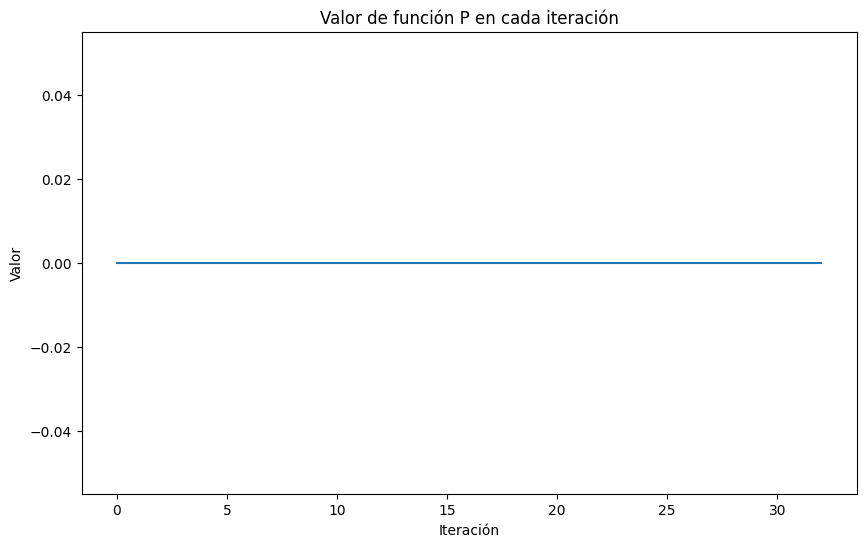

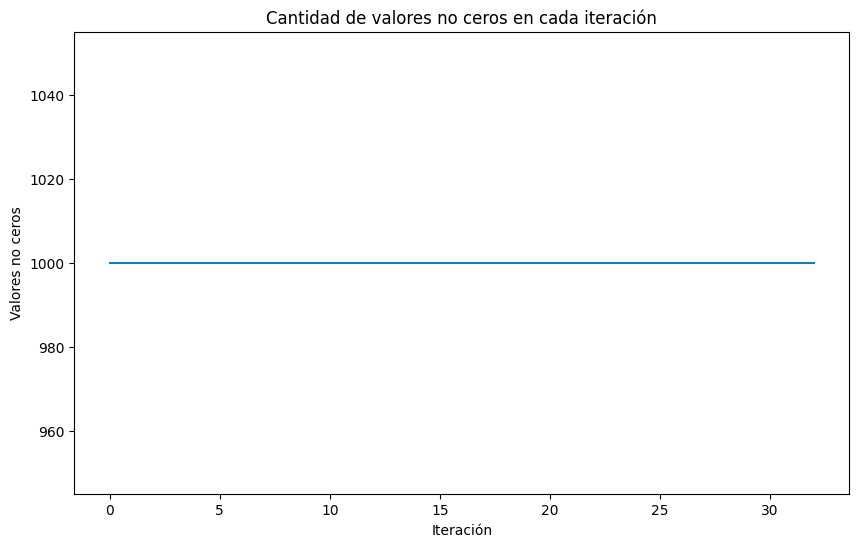

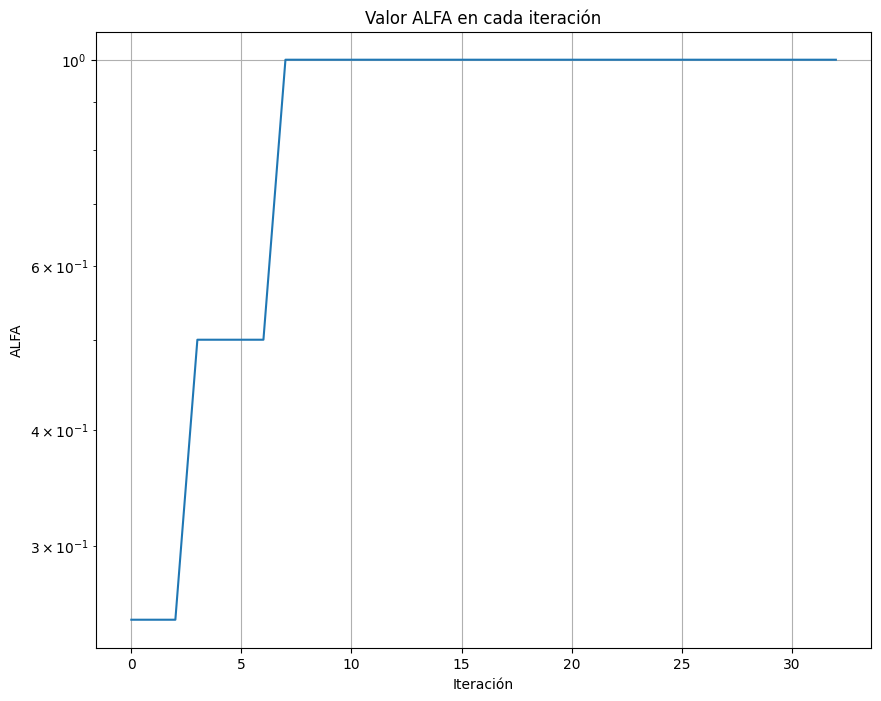

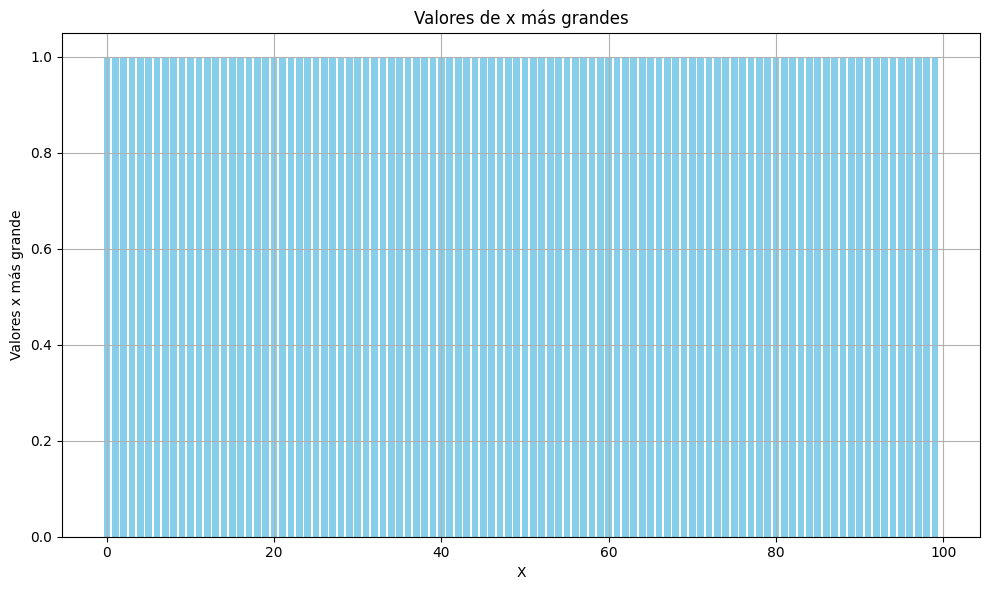

In [8]:
generate_metrics(f"./metrics/{problem.name}", x, hist, ts_metrics)